Abbiamo 10 dati e 1 features


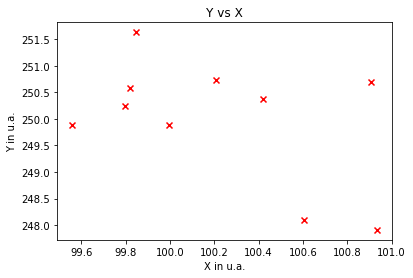

Iterazione    0: Costo    2.481
Iterazione 10000: Costo    1.904
Iterazione 20000: Costo    1.904
Iterazione 30000: Costo    1.904
Iterazione 40000: Costo    1.904
Iterazione 50000: Costo    1.904
Iterazione 60000: Costo    1.904
Iterazione 70000: Costo    1.904
Iterazione 80000: Costo    1.904
Iterazione 90000: Costo    1.904
La legge è Y = 2.494 X + 0.103 con costo    1.904


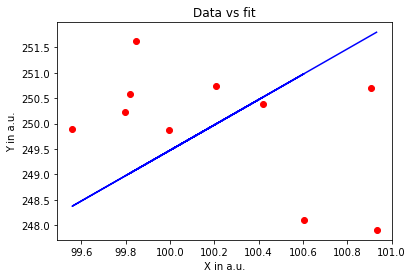

In [210]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
#from utils import *
import copy
import math
%matplotlib inline

#prendo i dati
nd = 10
x_tr = np.zeros(nd)
y_tr = np.zeros(nd)
for ct in range (nd):
    x_tr[ct] = 100 + np.random.standard_normal(size=(1,))
    y_tr[ct] = 2.5*100 + np.random.standard_normal(size=(1,))

#prendi dimensioni dati
print("Abbiamo",nd,"dati e",nf,"features")

#preprocessing


#plot dati ingresso
plt.scatter(x_tr,y_tr,marker='x',c='r')
plt.title("Y vs X")
plt.xlabel("X in u.a.")
plt.ylabel("Y in u.a.")
plt.show()

#calcolo costo
def comp_cost(x,y,w,b):
    nd = x.shape[0]
    cost = 0
    cd = 0
    for cd in range(nd):
        cost = cost + (w*x[cd] + b - y[cd])**2
        
    cost = cost/(2*nd)
    return cost

#calcolo gradiente
def comp_gradient(x,y,w,b):
    nd = x.shape[0]
    djdw = 0
    djdb = 0
    ct = 0
    for cd in range(nd):
        djdw = djdw + (w*x[cd] + b - y[cd])*x[cd]
        djdb = djdb + (w*x[cd] + b - y[cd])
    djdw = djdw/nd
    djdb = djdb/nd
    return djdw,djdb

#descent gradient
def grad_des(x,y,w_in,b_in,alpha,epoch):
    nd = x.shape[0]
    J_hist = []
    w_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(epoch):
        djdw,djdb = comp_gradient(x,y,w,b)
        w = w - alpha*djdw
        b = b - alpha*djdb
        if i < 10**5:
            costo = comp_cost(x,y,w,b)
            J_hist.append(costo)
            if i%math.ceil(epoch/10) == 0:
                w_hist.append(w)
                print(f"Iterazione {i:4}: Costo {float(J_hist[-1]):8.4g}")
    return w,b

#applico ML
pred = np.zeros(nd)
w,b = grad_des(x_tr,y_tr,0,0,1*10**-4,100000)
print(f"La legge è Y = {float(w):.4} X + {float(b):.4} con costo {float(comp_cost(x_tr,y_tr,w,b)):8.4g}")

#vedo predizioni
for i in range (nd):
    pred[i] = w*x_tr[i]+b
plt.plot(x_tr,pred,c='b')
plt.scatter(x_tr,y_tr,c='r')
plt.title("Data vs fit")
plt.xlabel("X in a.u.")
plt.ylabel("Y in a.u.")
plt.show()
    
    

In [209]:
comp_cost(x_tr,y_tr,0,np.mean(y_tr))


0.24993386451076166